<a href="https://colab.research.google.com/github/nikita-bhalodiya/ML-Unsupervised-Learning-Netflix-Movies-And-Tv-Shows-Clustering/blob/main/Netflix_Movies_And_Tv_Shows_Clustering_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - $\color{red}{\text{
Netflix Movies and TV Shows Clustering}}$



##### **Project Type**    - Unsupervised Machine Learning
##### **Contribution**    - Individual
##### **Team Member**-  $\color{green}{\text{Nikita Bhalodiya}}$


# **Project Summary -**

**1) Loading Data** : 

1. Importing libraries
2. Dataset Loading
3. Dataset Information

**2) Data Wrangling and Exploratory data analysis(EDA) :**

      1. Visualization for Release_Year
      2. Visualization for Title
      3. Visualization for Country
      4. Visualization for Type
      5. Visulization for listed_in
      6. Visualisation for date_added
      7. Visualisation for rating
    

**4) Pre processing of the data (NLP Data)** 

**5) Model implementation: Applying Clustering Algorithm** 



# **GitHub Link -**

https://github.com/nikita-bhalodiya/ML-Unsupervised-Learning-Netflix-Movies-And-Tv-Shows-Clustering.git

# **Problem Statement**


**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.**

**In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.**

**Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.**

**In this project, you are required to do**

1. Exploratory Data Analysis
2. Understanding what type content is available in different countries
3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features 

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline


import missingno as msno
import matplotlib.cm as cm

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load 
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/ML-Unsupervised Learning/Netflix Movies And Tv Shows Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

**We can see there is no duplicate values.**

### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
NaN_Checker = pd.DataFrame({"No Of Total Values": df.shape[0] , "No of NaN values": df.isnull().sum(),
                    "% of NaN values" : round((df.isnull().sum()/ df.shape[0])*100 , 2) })
NaN_Checker.sort_values("No of NaN values" , ascending = False)

,No Of Total Values,No of NaN values,% of NaN values
director,7787,2389,30.68
cast,7787,718,9.22
country,7787,507,6.51
date_added,7787,10,0.13
rating,7787,7,0.09
show_id,7787,0,0.00
type,7787,0,0.00
title,7787,0,0.00
release_year,7787,0,0.00
duration,7787,0,0.00


1. director column has highest NaN values 30.7% data is missing
2. cast column has 9% NaN values
3. country , date_added , rating this columns also containing missing values

In [11]:
#Ploting the null values present in the dataset
plot_nan = df.isna()
plot_nan.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

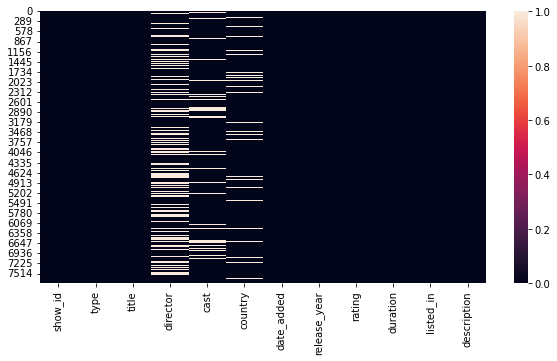

In [12]:
plt.figure( figsize = (10 , 5))
sns.heatmap(plot_nan)

<BarContainer object of 12 artists>

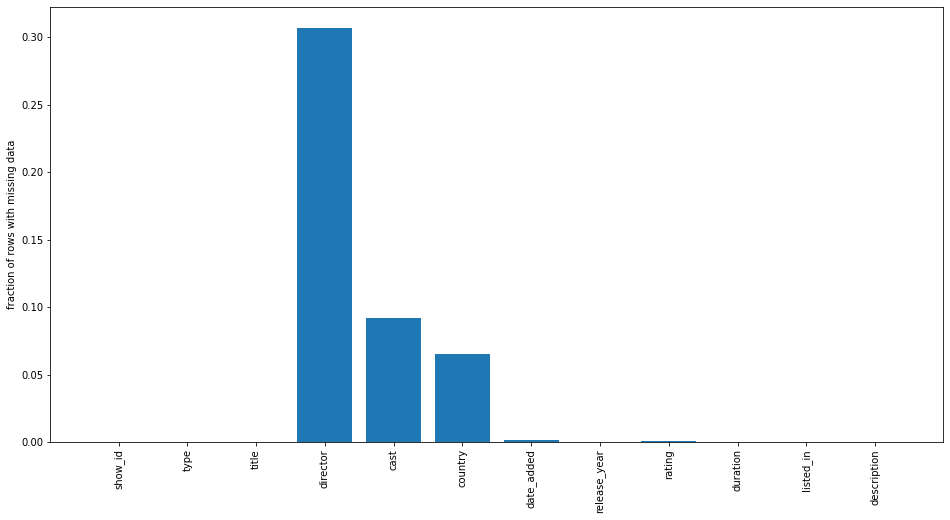

In [13]:
#Using barplot to check the no of NaN values present in this dataset
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

director and cast contains large number of null values so we will drop it

In [14]:
#Dropping director and cast features
df.drop(['director','cast'],axis=1, inplace=True)

In [15]:
#Looking NaN values on data_added
data_added_NaN = df[df['date_added'].isna()]
data_added_NaN.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...


In [16]:
data_added_NaN.shape

(10, 10)

There are only 10 observations which are containing NaN values in data_added column. So we will drop these ten obsevation from dataset.

In [17]:
df.dropna(subset = [ 'date_added' ], inplace = True)

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [19]:
# Dataset Describe
df.describe()

,release_year
count,7777.000000
mean,2013.935965
std,8.760694
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description 

There are total 7787 data and 12 columns. Lets try to understand about the columns we've got here.

1. **show_id** : Unique ID for every Movie / Tv Show
2. **type** : Identifier - A Movie or TV Show
3. **title** : Title of the Movie / Tv Show
4. **director** : Director of the Movie
5. **cast** : Actors involved in the movie / show
6. **country** : Country where the movie / show was produced
7. **date_added** : Date it was added on Netflix
8. **release_year** : Actual Releaseyear of the movie / show
9. **rating** : TV Rating of the movie / show
10. **duration** : Total Duration - in minutes or number of seasons
11. **listed_in** : Genere
12. **description**: The Summary description

### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.
df.nunique()

show_id         7777
type               2
title           7777
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        491
description     7759
dtype: int64

In [21]:
#Unique values of type column
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

## 3. ***Data Wrangling***

### Data Wrangling Code

Production Growth based on type of the content & release_year

In [22]:
yearly_movies=df[df.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
yearly_shows=df[df.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=df['release_year'].value_counts().sort_index(ascending=False).head(15)
     

In [23]:
yearly_movies.head()

2021     19
2020    457
2019    414
2018    386
2017    268
Name: release_year, dtype: int64

In [24]:
yearly_shows.head()

2021     12
2020    411
2019    582
2018    734
2017    744
Name: release_year, dtype: int64

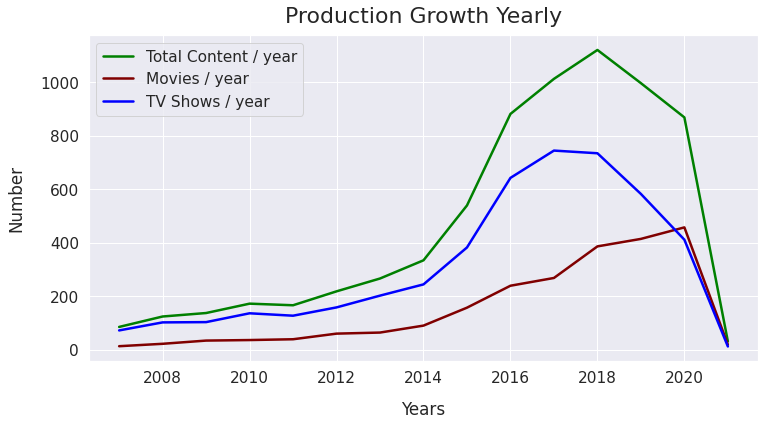

In [25]:
sns.set(font_scale=1.4)
total_content.plot(figsize=(12, 6), linewidth=2.5, color='green',label="Total Content / year")
yearly_movies.plot(figsize=(12, 6), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
yearly_shows.plot(figsize=(12, 6), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.legend()
plt.title("Production Growth Yearly", y=1.02, fontsize=22);
     

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Visualization for Release_Year

In [26]:
#unique values present in release_year
df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [27]:
type(df['release_year'][0])

numpy.int64

In [28]:
#value_count is on release_year
df['release_year'].value_counts().to_frame().T

,2018,2017,2019,2016,2020,2015,2014,2013,2012,2010,...,1969,1963,1954,1970,1956,1925,1964,1966,1947,1959
release_year,1120,1012,996,881,868,539,334,266,218,172,...,2,2,2,2,2,1,1,1,1,1


<Axes: >

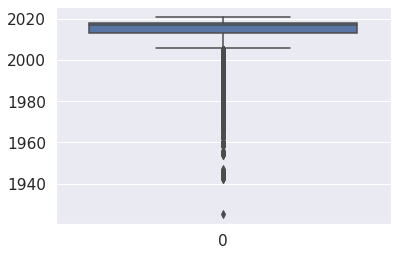

In [29]:
#Checking outliers on release_year column
sns.boxplot(df.release_year)

As we have seen earlier before 2014 the production growth for Movies & Tv Shows were very less ,that's why it's showing those values(release_year less than 2009) as outliers

In [30]:
#Replacing outliers with mean value
release_year_Q1 = df.release_year.quantile(0.25)
release_year_Q3 = df.release_year.quantile(0.75)
release_year_IQR = release_year_Q3 - release_year_Q1
print(f'release_year_Q1 = {release_year_Q1}\nrelease_year_Q3 = {release_year_Q3}\nrelease_year_IQR = {release_year_IQR}')

release_year_Q1 = 2013.0
release_year_Q3 = 2018.0
release_year_IQR = 5.0


In [31]:
release_year_outliers = df[(df.release_year < (release_year_Q1 - 1.5 * release_year_IQR)) |
                           ( df.release_year > (release_year_Q3 + 1.5 * release_year_IQR)) ] 

we don't have have any release_year which is greater than 2018

In [32]:
# 15 percentile value is 2009
df["release_year"] = np.where(df["release_year"] <2009, df.release_year.mean(),df['release_year'])

In [33]:
#Boxplot for release_year
df.release_year.describe()

count    7777.000000
mean     2016.260846
std         2.726841
min      2009.000000
25%      2013.935965
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

<Axes: >

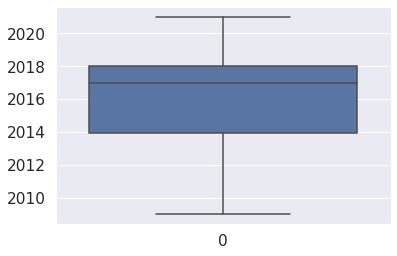

In [34]:
sns.boxplot(df.release_year)

In [35]:
#Change data type of release_year float to int
df.release_year = df.release_year.astype("int64")

##### 1. Why did you pick the specific chart?

Using box plot we can easly identify ouliers.


##### 2. What is/are the insight(s) found from the chart?

We haldle outlier and change data type of release_year to int.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes this will help for creating positive business impact.

#### Chart - 2 Visualization for Title

In [36]:
# No of unique title present in title column
df.title.nunique()

7777

In [37]:
df.shape[0]

7777

All the values present in Title are unique

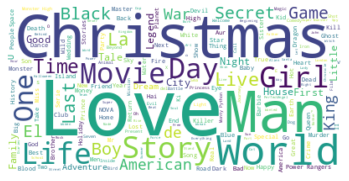

In [38]:
# Most occured word in Title
#subsetting df
df_wordcloud = df['title']
text = " ".join(word for word in df_wordcloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

Image show word mostly used in all title.

##### 2. What is/are the insight(s) found from the chart?

It seems like words like "Love", "Man", "World", "Story" , "Christmas" are very common in titles.

I have suprised to see "Christmas" ocuured so many time . The reason maybe those movies released on the month of december.

#### Chart - 3 Visualization for Country

In [39]:
df.country.nunique()
     

681

In [40]:
df.country.value_counts().rename_axis('Country').reset_index(name='counts').T

,0,1,2,3,4,5,6,7,8,9,...,671,672,673,674,675,676,677,678,679,680
Country,United States,India,United Kingdom,Japan,South Korea,Canada,Spain,France,Egypt,Turkey,...,"United States, South Korea, Japan","Lebanon, United Arab Emirates, France, Switzer...","France, Australia, Germany","Ireland, United States","United States, Canada, Germany","Russia, United States, China","Italy, Switzerland, France, Germany","United States, United Kingdom, Canada","United States, United Kingdom, Japan","Sweden, Czech Republic, United Kingdom, Denmar..."
counts,2549,923,396,225,183,177,134,115,101,100,...,1,1,1,1,1,1,1,1,1,1


In [41]:
#Check no of NaN values
df.country.isna().sum()

506

In [42]:
#Let's replace those NaN values with mode value
#mode value of country column
df.country.mode()[0]
     

'United States'

In [43]:
df.country[df.country.isna()] = df.country.mode()[0]
df.country[df.country.isna()]

Series([], Name: country, dtype: object)

In [44]:
#Again Checking for NaN values present
df.country.isna().sum()

0

In [45]:
#countries and number of netflix productions
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(df)):
  if isinstance(df['country'].iloc[i] , str):
    split=df['country'].iloc[i].split(',')
    for k in split:
      country_list.append(k.strip())
      if df['type'].iloc[i]=='TV Show':
        tv_show.append(k.strip())
      if df['type'].iloc[i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [46]:
#Creating a new DataFrame country_df
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies']) 
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)
     

In [47]:
#Top 5 countries
top_countries=country_df.head()
top_countries

,country,Productions,TV-Shows,Movies
0,United States,3797,1136,2661
1,India,990,75,915
2,United Kingdom,722,255,467
3,Canada,412,126,286
4,France,349,84,265


<Axes: xlabel='country'>

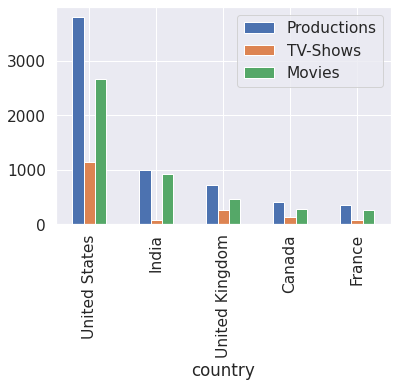

In [48]:

top_countries.head(9).plot(x="country", y=['Productions','TV-Shows','Movies'], kind="bar")

##### 1. Why did you pick the specific chart?

Boix help to visulaized Total Number of projuction in diffetent country with respect to Movies and TV Shows,

##### 2. What is/are the insight(s) found from the chart?

Uniteted State have high number of production and france have low number of production.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help to creating a positive business impact.

#### Chart - 4 Visualization for Type

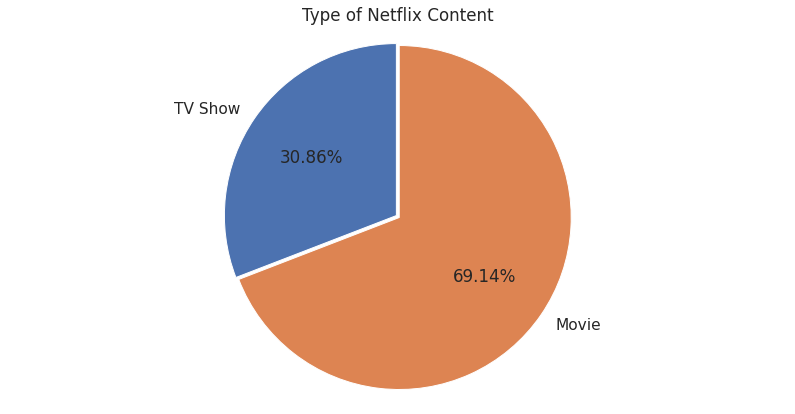

In [49]:
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,explode=[0.01,0.01],
        autopct='%1.2f%%', startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

With Pie Plot we can Visulazed that most of the contents are Movies
Less than ⅓ content are Tv Shows

#### Chart - 5 Visulization for listed_in

In [50]:
#unique values present in listed_in 
df.listed_in.nunique()

491

In [51]:
#NaN values present in listed_in 
df.listed_in.isna().sum()

0

In [52]:
df.listed_in.value_counts().to_frame().T
     

,Documentaries,Stand-Up Comedy,"Dramas, International Movies","Comedies, Dramas, International Movies","Dramas, Independent Movies, International Movies",Kids' TV,Children & Family Movies,"Documentaries, International Movies","Children & Family Movies, Comedies","Comedies, International Movies",...,"TV Horror, TV Mysteries, Teen TV Shows","Action & Adventure, International Movies, Thrillers","Anime Series, TV Horror, TV Thrillers","Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy","TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","Anime Series, Crime TV Shows, TV Thrillers","Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows","Crime TV Shows, International TV Shows, Reality TV","International Movies, Romantic Movies, Sci-Fi & Fantasy","International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows"
listed_in,334,321,320,243,215,204,177,172,169,161,...,1,1,1,1,1,1,1,1,1,1


In [53]:
#Making Categoies

categories = ", ".join(df['listed_in']).split(", ")
categories[:5]

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies']

In [54]:
len(categories)

17051

In [55]:
len(set(categories))

42

There are 42 unique categories present & in this dataset all the categories occured in total 17051 times

Creating a dictionary ( category_wise_count ) where for each category there will be a value which basically tells us how many times that particular category occured

In [56]:
category_wise_count = {}
for category in set(categories):
  category_wise_count[category] = categories.count(category)

In [57]:
category_wise_count    

{'Sports Movies': 196,
 'Children & Family Movies': 532,
 'TV Mysteries': 90,
 'Comedies': 1471,
 'British TV Shows': 231,
 'Horror Movies': 312,
 'Romantic Movies': 531,
 'Science & Nature TV': 85,
 'TV Shows': 12,
 'International TV Shows': 1198,
 'Thrillers': 491,
 'Music & Musicals': 321,
 'Reality TV': 222,
 'TV Sci-Fi & Fantasy': 75,
 'TV Action & Adventure': 149,
 'International Movies': 2437,
 'Classic Movies': 103,
 'Romantic TV Shows': 333,
 'Docuseries': 352,
 'Crime TV Shows': 426,
 'Anime Features': 57,
 'LGBTQ Movies': 90,
 'TV Horror': 69,
 'TV Dramas': 703,
 'Documentaries': 786,
 "Kids' TV": 412,
 'TV Thrillers': 50,
 'Stand-Up Comedy & Talk Shows': 52,
 'Stand-Up Comedy': 329,
 'Korean TV Shows': 150,
 'Faith & Spirituality': 57,
 'Classic & Cult TV': 25,
 'Spanish-Language TV Shows': 146,
 'Cult Movies': 59,
 'Anime Series': 147,
 'Teen TV Shows': 60,
 'Movies': 56,
 'Sci-Fi & Fantasy': 218,
 'Action & Adventure': 721,
 'TV Comedies': 518,
 'Independent Movies': 673,

In [58]:
#Sorting category_wise_count by value
sorted_category_wise_count = sorted(category_wise_count.items(), key=lambda x: x[1])
sorted_category_wise_count[:5]

[('TV Shows', 12),
 ('Classic & Cult TV', 25),
 ('TV Thrillers', 50),
 ('Stand-Up Comedy & Talk Shows', 52),
 ('Movies', 56)]

In [59]:
#Top 10 most occurred categories
top_10_most_occurred_categories = sorted_category_wise_count[-10:]
top_10_most_occurred_categories

[('Romantic Movies', 531),
 ('Children & Family Movies', 532),
 ('Independent Movies', 673),
 ('TV Dramas', 703),
 ('Action & Adventure', 721),
 ('Documentaries', 786),
 ('International TV Shows', 1198),
 ('Comedies', 1471),
 ('Dramas', 2106),
 ('International Movies', 2437)]

In [60]:
top_10_most_occurred_category_name = []
top_10_most_occurred_category_count = []
for tup in top_10_most_occurred_categories:
  top_10_most_occurred_category_name.append(tup[0])
  top_10_most_occurred_category_count.append(tup[1])

<Figure size 1152x576 with 0 Axes>

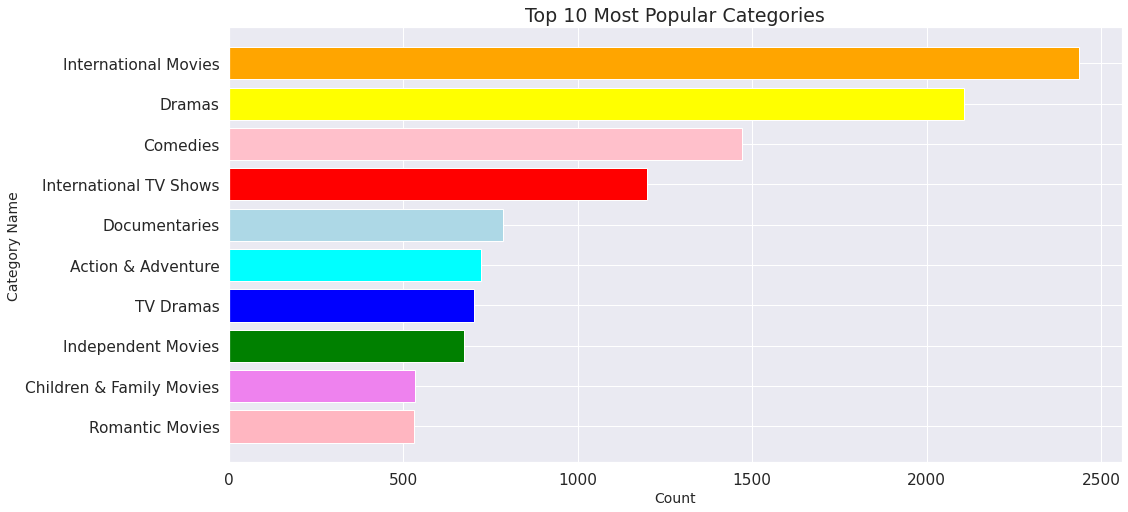

<Figure size 1152x576 with 0 Axes>

In [61]:
plt.figure( figsize = (16,8))
color=['lightpink', 'violet', 'green', 'blue', 'cyan' , "lightblue" ,'red', 'pink', 'yellow', 'orange']
plt.barh(top_10_most_occurred_category_name , top_10_most_occurred_category_count ,
        color= color)
plt.title("Top 10 Most Popular Categories",fontsize = 19)
plt.xlabel("Count", fontsize = 14 )
plt.ylabel("Category Name" , fontsize = 14 )
plt.figure( figsize = (16,8))
     

In [62]:
# Creating a new column no_of_category

no_of_category = []
for categories in df.listed_in.values:
  len_categories = len(categories.split(","))
  no_of_category.append(len_categories)
     

In [63]:
df['no_of_category'] = no_of_category

In [64]:
df[['listed_in' , 'no_of_category']].head()

,listed_in,no_of_category
0,"International TV Shows, TV Dramas, TV Sci-Fi &...",3
1,"Dramas, International Movies",2
2,"Horror Movies, International Movies",2
3,"Action & Adventure, Independent Movies, Sci-Fi...",3
4,Dramas,1


Text(0, 0.5, 'Count')

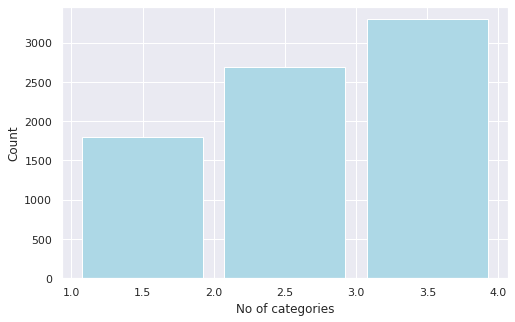

In [65]:
#Histogram of no_of_category using listed_in
sns.set(style="darkgrid")
plt.figure(figsize = (8,5))
plt.hist(df.no_of_category , bins=[1,2,3,4] , range = (1 ,4) , rwidth = 0.85, color ='lightblue')
plt.xlabel("No of categories")
plt.ylabel("Count")

#### Chart - 6 Visualisation for date_added

In [66]:
df.date_added.head(3)
     

0      August 14, 2020
1    December 23, 2016
2    December 20, 2018
Name: date_added, dtype: object

In [67]:
# create a new column date_added_month using date_added column

df['date_added_month'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df[['date_added' , 'date_added_month']].head()

,date_added,date_added_month
0,"August 14, 2020",August
1,"December 23, 2016",December
2,"December 20, 2018",December
3,"November 16, 2017",November
4,"January 1, 2020",January


In [68]:
month_df=df['date_added_month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'month': 'Count'}, inplace=True)
month = month_df.loc[0:11]
month

,Month_Name,date_added_month
0,December,817
1,October,780
2,January,746
3,November,730
4,March,661
5,September,614
6,August,612
7,April,596
8,July,592
9,June,538


In [69]:
month_names = month.Month_Name.values
month_wise_count = month.date_added_month.values

Text(0, 0.5, 'Count')

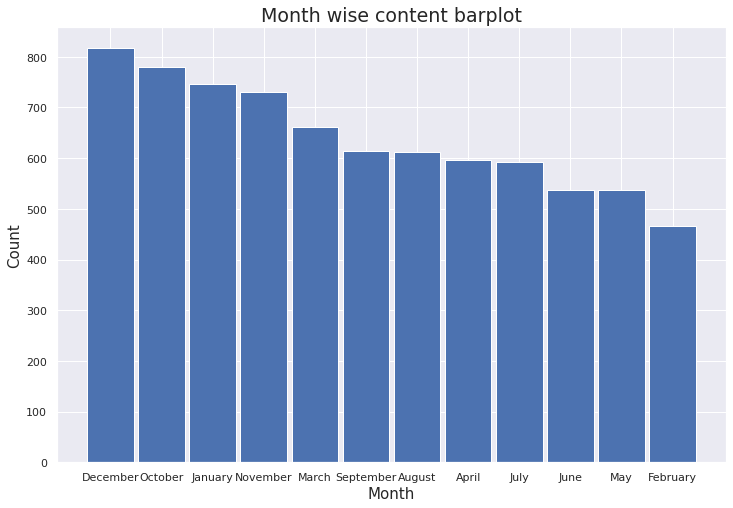

In [70]:
plt.figure(figsize = (12 ,8 ))
plt.bar(month_names , month_wise_count, width = 0.91)
plt.title("Month wise content barplot" , fontsize = 19)
plt.xlabel("Month" , fontsize = 15)
plt.ylabel("Count" , fontsize = 15)

We can say that December is the holiday season and it also has Christmas, so in that month most of the content got uploaded.

In [71]:
df.date_added_month.value_counts().to_frame().T

,December,October,January,November,March,September,August,April,July,June,May,February,
date_added_month,817,780,746,730,661,614,612,596,592,538,537,466,88


#### Chart - 7 Visualisation for rating

In [72]:
df.rating.value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [73]:
#Most popular TV-Shows Rating
df_tv_show = df[df['type']== 'TV Show' ]
df_tv_show.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,3,August
5,s6,TV Show,46,Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,3,July


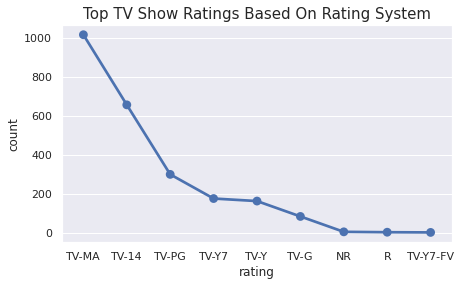

In [74]:
#Pointplot on top tv show ratings 
tv_ratings = df_tv_show.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (7,4)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='15')
plt.show()

In [75]:
#Most popular Movies Rating

df_movies = df[df['type'] == 'Movie' ]
df_movies.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2,December


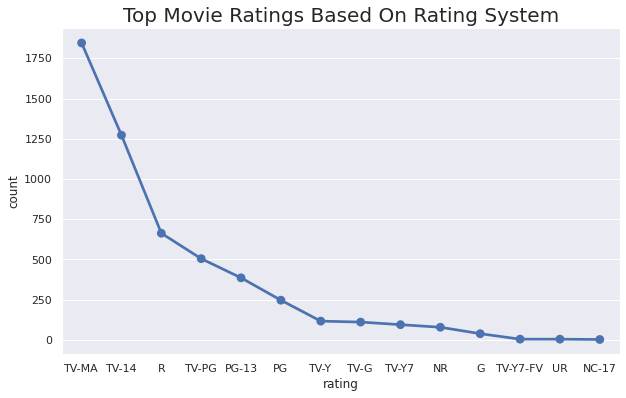

In [76]:
#Pointplot on top Movie show ratings 
tv_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (10,6)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

Most of the contents got ratings like

TV-MA (For Mature Audiences)

TV-14 ( May be unsuitable for children under 14 )

TV-PG ( Parental Guidance Suggested )

NR ( Not Rated )


## ***5. Feature Engineering & Data Pre-processing***

In [77]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,3,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",3,November
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,January


There are two features having text values like description and listed_in. So we need Text Pre processing before fith this data to ML.

**Text Preprocessing Steps:**

  1) Removing Punctuations

  2) Removing Stopwords

  3) Tokenizing

  4) Stemming



In [78]:
#download nltk
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)


True

### **1.description features**

**1. Removing Punctuations**


In [79]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
     

In [80]:
df['description'] = df['description'].apply(remove_punctuation)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,3,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",When an army recruit is found dead his fellow ...,2,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",In a postapocalyptic world ragdoll robots hide...,3,November
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123 min,Dramas,A brilliant group of students become cardcount...,1,January


**2. Removing stopwords**

In [81]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [82]:
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
for i in sw:
  print(i , end=',  ')

i,  me,  my,  myself,  we,  our,  ours,  ourselves,  you,  you're,  you've,  you'll,  you'd,  your,  yours,  yourself,  yourselves,  he,  him,  his,  himself,  she,  she's,  her,  hers,  herself,  it,  it's,  its,  itself,  they,  them,  their,  theirs,  themselves,  what,  which,  who,  whom,  this,  that,  that'll,  these,  those,  am,  is,  are,  was,  were,  be,  been,  being,  have,  has,  had,  having,  do,  does,  did,  doing,  a,  an,  the,  and,  but,  if,  or,  because,  as,  until,  while,  of,  at,  by,  for,  with,  about,  against,  between,  into,  through,  during,  before,  after,  above,  below,  to,  from,  up,  down,  in,  out,  on,  off,  over,  under,  again,  further,  then,  once,  here,  there,  when,  where,  why,  how,  all,  any,  both,  each,  few,  more,  most,  other,  some,  such,  no,  nor,  not,  only,  own,  same,  so,  than,  too,  very,  s,  t,  can,  will,  just,  don,  don't,  should,  should've,  now,  d,  ll,  m,  o,  re,  ve,  y,  ain,  aren,  

In [83]:
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)

In [84]:
df['description'] = df['description'].apply( remove_stopwords )
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,3,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,2,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,2,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,3,November
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123 min,Dramas,brilliant group students become cardcounting e...,1,January


**3. Tokenizing: Count Vocabulary items using CountVectorizer()**

In [85]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['description'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [86]:
dictionary

dict_items([('future', 7153), ('elite', 5642), ('inhabit', 8945), ('island', 9221), ('paradise', 12668), ('far', 6398), ('crowded', 4230), ('slums', 16086), ('get', 7349), ('one', 12297), ('chance', 3060), ('join', 9439), ('saved', 15190), ('squalor', 16502), ('devastating', 4825), ('earthquake', 5491), ('hits', 8306), ('mexico', 11098), ('city', 3326), ('trapped', 17904), ('survivors', 17050), ('walks', 18862), ('life', 10168), ('wait', 18839), ('rescued', 14507), ('trying', 18046), ('desperately', 4778), ('stay', 16611), ('alive', 781), ('army', 1222), ('recruit', 14227), ('found', 6937), ('dead', 4492), ('fellow', 6524), ('soldiers', 16211), ('forced', 6873), ('confront', 3780), ('terrifying', 17426), ('secret', 15378), ('thats', 17480), ('haunting', 8010), ('jungle', 9534), ('training', 17861), ('camp', 2751), ('postapocalyptic', 13347), ('world', 19299), ('ragdoll', 13946), ('robots', 14833), ('hide', 8185), ('fear', 6477), ('dangerous', 4419), ('machines', 10525), ('exterminate',

In [87]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

In [88]:
#Creating a new DataFrame vocab_before_stemming
# Store the count in panadas dataframe with vocab as index
vocab_before_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_before_stemming = vocab_before_stemming.sort_values("count" ,ascending=False)

In [89]:
vocab_before_stemming.head(4)

,Word,count
18855,şeref,19593
10390,ōarai,19592
12377,łukasz,19591
11101,überelite,19590


In [90]:
vocab_before_stemming.head(20).T

,18855,10390,12377,11101,11673,13288,6584,18193,10428,9867,19555,6536,19590,16413,7192,18395,19580,19587,10293,18069
Word,şeref,ōarai,łukasz,überelite,über,ömer,émile,ángel,álvaro,álex,zé,zurich,zumbo,zulu,zuhu,zuckerberg,zoé,zozo,zoya,zorro
count,19593,19592,19591,19590,19589,19588,19587,19586,19585,19584,19583,19582,19581,19580,19579,19578,19577,19576,19575,19574


In [91]:
#TOP 15 most occurred words
top15_most_ocurred_vacab = vocab_before_stemming.head(15)

top15_most_occurred_words = top15_most_ocurred_vacab.Word.values 
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelite', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu'],
      dtype=object)

In [92]:
top15_most_occurred_words_count = top15_most_ocurred_vacab['count'].values 
top15_most_occurred_words_count

array([19593, 19592, 19591, 19590, 19589, 19588, 19587, 19586, 19585,
       19584, 19583, 19582, 19581, 19580, 19579])

<BarContainer object of 15 artists>

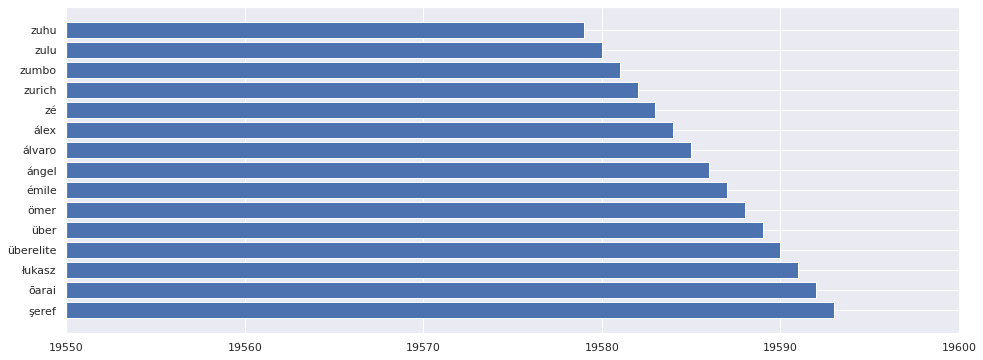

In [93]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(19550, 19600)
plt.barh(top15_most_occurred_words , top15_most_occurred_words_count )
     

**4. Stemming: use SnowballStemmer( 'english' )**

In [94]:
# Create an object of stemming function
stemmer = SnowballStemmer("english")
def Apply_stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [95]:
#Stemming for description
df['description'] = df['description'].apply( Apply_stemming )
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,3,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world ragdol robot hide fear dan...,3,November
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123 min,Dramas,brilliant group student becom cardcount expert...,1,January


**5.  TfidfVectorizer (after stemming)**

In [96]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(df['description'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [97]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

In [98]:
#Creating a new DataFrame vocab_after_stemming
# Store the count in panadas dataframe with vocab as index
vocab_after_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_after_stemming = vocab_after_stemming.sort_values("count" ,ascending=False)

In [99]:
#TOP 15 most occurred words
top15_most_ocurred_vocab = vocab_after_stemming.head(15)
top15_most_occurred_words = top15_most_ocurred_vocab.Word.values 
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelit', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu'],
      dtype=object)

In [100]:
top15_most_occurred_words_count = top15_most_ocurred_vocab['count'].values 
top15_most_occurred_words_count

array([14240, 14239, 14238, 14237, 14236, 14235, 14234, 14233, 14232,
       14231, 14230, 14229, 14228, 14227, 14226])

<BarContainer object of 15 artists>

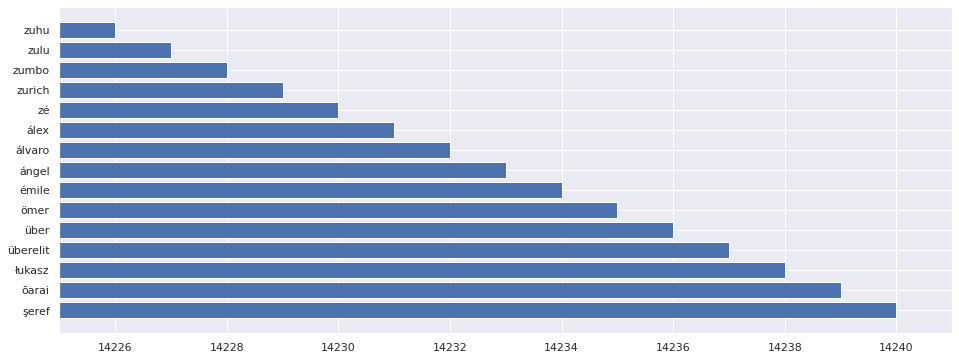

In [121]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(14225, 14241)
plt.barh(top15_most_occurred_words , top15_most_occurred_words_count )

In [122]:
#Adding a new column length which will contain length of description
df['Length(description)'] = df['description'].apply(lambda x: len(x))
df.head(3)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description),Length(listed-in)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,3,August,82,40
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,drama intern movi,devast earthquak hit mexico citi trap survivor...,2,December,88,17
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2,December,102,23


### 2. **listed_in Features**

**1. Removing Punctuations**

In [103]:
df['listed_in'] = df['listed_in'].apply(remove_punctuation)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,International TV Shows TV Dramas TV SciFi Fan...,futur elit inhabit island paradis far crowd sl...,3,August,82
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas International Movies,devast earthquak hit mexico citi trap survivor...,2,December,88
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,Horror Movies International Movies,armi recruit found dead fellow soldier forc co...,2,December,102
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,Action Adventure Independent Movies SciFi Fa...,postapocalypt world ragdol robot hide fear dan...,3,November,89
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123 min,Dramas,brilliant group student becom cardcount expert...,1,January,99


**2) Removing Stopwords**

In [104]:
#Remove stopwords for listed_in
df['listed_in'] = df['listed_in'].apply( remove_stopwords )
df.head( 2 )

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,international tv shows tv dramas tv scifi fantasy,futur elit inhabit island paradis far crowd sl...,3,August,82
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,dramas international movies,devast earthquak hit mexico citi trap survivor...,2,December,88


**3. Tokenizing: Count Vocabulary items using CountVectorizer()**

In [105]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['listed_in'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()
     

In [106]:
dictionary 

dict_items([('international', 19), ('tv', 41), ('shows', 33), ('dramas', 12), ('scifi', 31), ('fantasy', 15), ('movies', 23), ('horror', 17), ('action', 0), ('adventure', 1), ('independent', 18), ('mysteries', 26), ('thrillers', 40), ('crime', 8), ('docuseries', 11), ('documentaries', 10), ('sports', 36), ('comedies', 6), ('anime', 2), ('series', 32), ('reality', 28), ('romantic', 29), ('science', 30), ('nature', 27), ('british', 3), ('korean', 21), ('music', 24), ('musicals', 25), ('lgbtq', 22), ('faith', 13), ('spirituality', 35), ('kids', 20), ('spanishlanguage', 34), ('children', 4), ('family', 14), ('classic', 5), ('cult', 9), ('standup', 37), ('comedy', 7), ('talk', 38), ('teen', 39), ('features', 16)])

In [107]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

In [109]:
listed_in_vocab_before_stem = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})
listed_in_vocab_before_stem = listed_in_vocab_before_stem.sort_values("count" ,ascending=False)
listed_in_vocab_before_stem.head()

,Word,count
1,tv,41
12,thrillers,40
40,teen,39
39,talk,38
37,standup,37


In [110]:
#TOP 15 most occurred words in listed in
top15_most_ocurred_vocab_listed_in = listed_in_vocab_before_stem.head(15)

top15_most_ocurred_words_listed_in = top15_most_ocurred_vocab_listed_in.Word.values 
top15_most_ocurred_words_listed_in

array(['tv', 'thrillers', 'teen', 'talk', 'standup', 'sports',
       'spirituality', 'spanishlanguage', 'shows', 'series', 'scifi',
       'science', 'romantic', 'reality', 'nature'], dtype=object)

In [111]:
top15_most_occurred_words_in_listed_in_count = top15_most_ocurred_vocab_listed_in['count'].values 
top15_most_occurred_words_in_listed_in_count

array([41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27])

<BarContainer object of 15 artists>

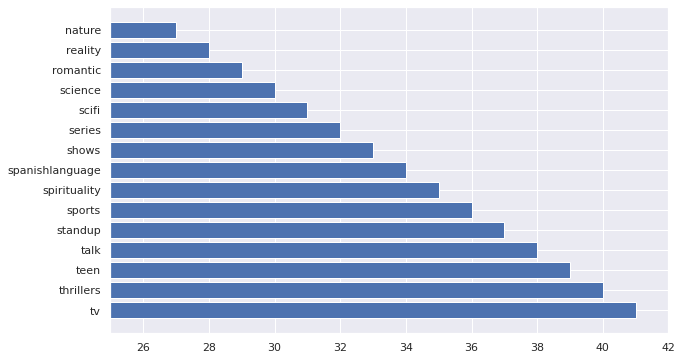

In [112]:
plt.figure( figsize = ( 10,6 ))
plt.xlim(25, 42 )
plt.barh(top15_most_ocurred_words_listed_in , top15_most_occurred_words_in_listed_in_count )

**4. Stemming: use SnowballStemmer( 'english' )**

In [113]:
#Stemming for listed_in
df['listed_in'] = df['listed_in'].apply( Apply_stemming )
df.head(3)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,3,August,82
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,drama intern movi,devast earthquak hit mexico citi trap survivor...,2,December,88
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2,December,102


**5.  TfidfVectorizer (after stemming)**

In [114]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(df['listed_in'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [115]:
dictionary

dict_items([('intern', 18), ('tv', 39), ('show', 31), ('drama', 11), ('scifi', 29), ('fantasi', 14), ('movi', 22), ('horror', 16), ('action', 0), ('adventur', 1), ('independ', 17), ('mysteri', 24), ('thriller', 38), ('crime', 7), ('docuseri', 10), ('documentari', 9), ('sport', 34), ('comedi', 6), ('anim', 2), ('seri', 30), ('realiti', 26), ('romant', 27), ('scienc', 28), ('natur', 25), ('british', 3), ('korean', 20), ('music', 23), ('lgbtq', 21), ('faith', 12), ('spiritu', 33), ('kid', 19), ('spanishlanguag', 32), ('children', 4), ('famili', 13), ('classic', 5), ('cult', 8), ('standup', 35), ('talk', 36), ('teen', 37), ('featur', 15)])

In [116]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)
     

In [117]:
#new DataFrame vocab_after_stemming_listed_in
vocab_after_stemming_listed_in = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})
# Sort the dataframe by count
vocab_after_stemming_listed_in = vocab_after_stemming_listed_in.sort_values("count" ,ascending=False)

top15_most_ocurred_vocab_lised_in_after_stem = vocab_after_stemming_listed_in.head(15)
top15_most_ocurred_vocab_lised_in_after_stem_word = top15_most_ocurred_vocab_lised_in_after_stem.Word.values 
top15_most_ocurred_vocab_lised_in_after_stem_word

array(['tv', 'thriller', 'teen', 'talk', 'standup', 'sport', 'spiritu',
       'spanishlanguag', 'show', 'seri', 'scifi', 'scienc', 'romant',
       'realiti', 'natur'], dtype=object)

In [118]:
top15_most_occurred_words_listed_in_count = top15_most_ocurred_vocab_lised_in_after_stem['count'].values 
top15_most_occurred_words_listed_in_count

array([39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25])

<BarContainer object of 15 artists>

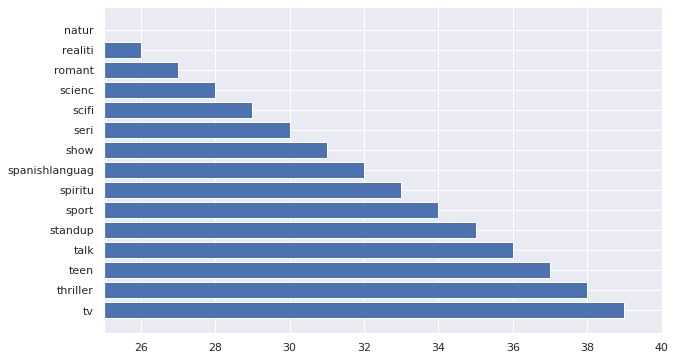

In [119]:
plt.figure( figsize = ( 10,6 ))
plt.xlim(25, 40 )
plt.barh(top15_most_ocurred_vocab_lised_in_after_stem_word , top15_most_occurred_words_listed_in_count )

In [120]:
#Adding a new column length( listed-in ) which will contain length of listed_in

df['Length(listed-in)'] = df['listed_in'].apply(lambda x: len(x))
df.head(3)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description),Length(listed-in)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,3,August,82,40
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,drama intern movi,devast earthquak hit mexico citi trap survivor...,2,December,88,17
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2,December,102,23


In [123]:
df.columns


Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'no_of_category',
       'date_added_month', 'Length(description)', 'Length(listed-in)'],
      dtype='object')

In [124]:
df[['description', 'Length(description)', 'listed_in' ,'Length(listed-in)' ]].head(3)

,description,Length(description),listed_in,Length(listed-in)
0,futur elit inhabit island paradis far crowd sl...,82,intern tv show tv drama tv scifi fantasi,40
1,devast earthquak hit mexico citi trap survivor...,88,drama intern movi,17
2,armi recruit found dead fellow soldier forc co...,102,horror movi intern movi,23


## ***6. Model implementation: Applying Clustering Algorithm***


Clustering can be considered the most important unsupervised learning problem; so, as every other problem of this kind, it deals with finding a structure in a collection of unlabeled data.A loose definition of clustering could be “the process of organizing objects into groups whose members are similar in some way”.A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters.

So we start of follwing clustering Algorithms: 

**1. K-Means Clustering: Elbow Method**

**2. DBSCAN**

**3. Hirarchical Clustering: Dendrogram**

**4. AgglomerativeClustering**


### ML Model - 1  K-Means Clustering: Elbow Method

In [134]:
X_features_rec = df[['no_of_category' ,'Length(description)','Length(listed-in)']]
stdscaler = preprocessing.StandardScaler()
X_features_rec.describe()

,no_of_category,Length(description),Length(listed-in)
count,7777.000000,7777.000000,7777.000000
mean,2.192491,93.010930,24.328019
std,0.786070,10.773339,10.685483
min,1.000000,25.000000,4.000000
25%,2.000000,87.000000,17.000000
50%,2.000000,93.000000,24.000000
75%,3.000000,100.000000,32.000000
max,3.000000,185.000000,62.000000


In [135]:
X_rescale=stdscaler.fit_transform(X_features_rec)
X=X_rescale
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]  

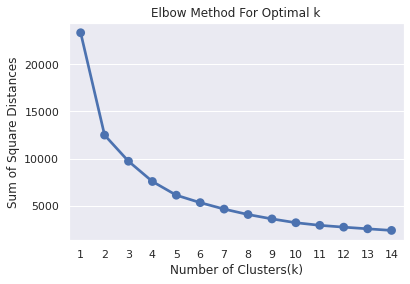

In [136]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Let's use clusters= 3

In [137]:
kmeans = KMeans(n_clusters = 3 )
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

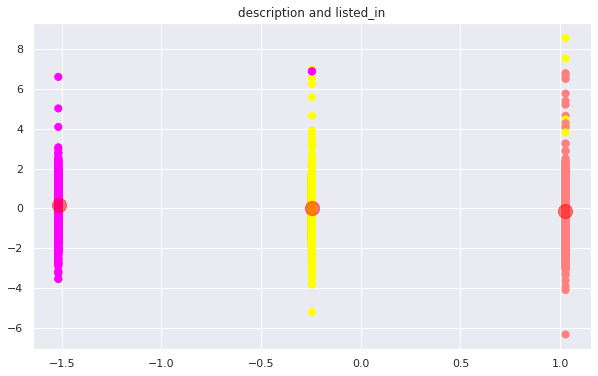

In [138]:
plt.figure(figsize=(10 , 6))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### ML Model - 2 DBSCAN

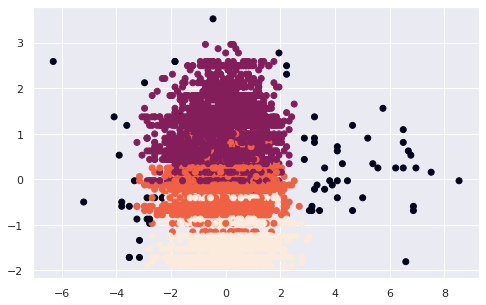

In [139]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=( 8 , 5 ))
plt.scatter(X[:,1], X[:,2], c=y_pred)

The black colour dots(*) are noise

### ML Model - 3 Hirarchical Clustering: Dendrogram

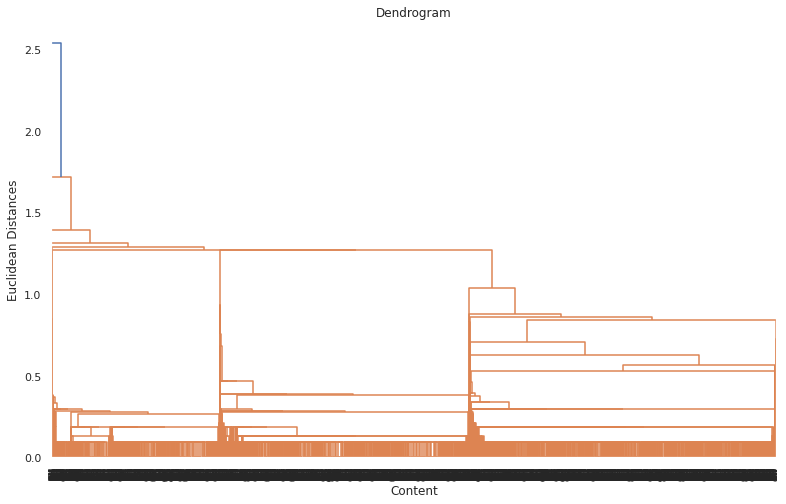

In [140]:
# Let's import sch
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold

**No. of Cluster = 3**

### ML Model - 4 Agglomerative Clustering

In [141]:
# Let's  import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

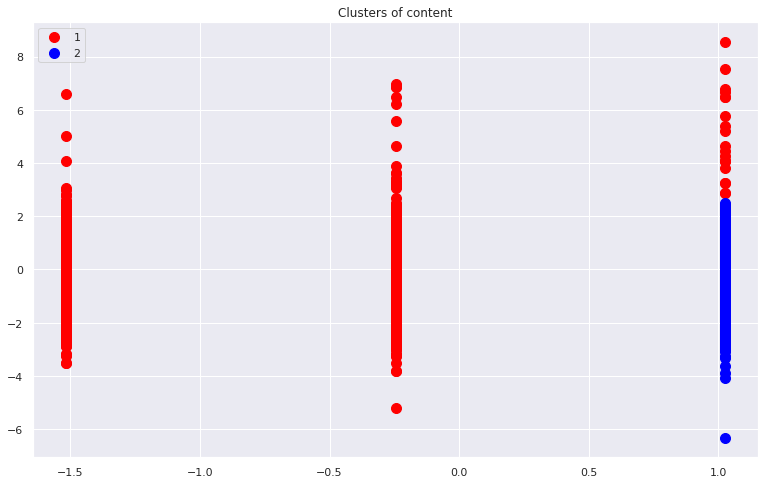

In [142]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
# plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')

plt.title('Clusters of content')

plt.legend()
plt.show()
     

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**Data Exploration Conclusions:**

1. There are two types of contents where 30.86% includes TV shows and the
remaining 69.14% carries Movies.
2. Analysis from the content added over years that Netflix is focusing movies and TV shows (Fom 2016 data we get to know that Movies is increased by 80% and TV shows is increased by 73% compare.
3. The most number of TV Shows released in 2017 and for Movies it is 2020.
4. On Netflix USA has the largest number of contents. And most of the countries preferred to produce movies more than TV shows.
5. TOP 3 content categories are International movies , dramas , comedies.


**Modeling Conclusions:**

1. Applied different clustering models like Kmeans, hierarchical, Agglomerative clustering, DBSCAN on data we got the best cluster arrangements.

2. By applying different clustering algorithms to our dataset .we get the optimal number of cluster is equal to 3.

3. We can conclude that K Means is best for identification than Hierarchical.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***